## Step 5B - Visualizing gradient slopes

#####  written by R.A.I. Bethlehem & B. Soergel for the Autism Gradients project at Brainhack Cambridge 2017

In [4]:
%matplotlib inline
from scipy import stats
import os
import pandas as pd
import numpy as np
import seaborn.apionly as sn
import matplotlib.pyplot as plt


In [5]:
# first import the input list from the csv file
import pandas as pd
# read in csv
df_phen = pd.read_csv('./data/SelectedSubjects.csv')
selected = list(df_phen.filename_npy)

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


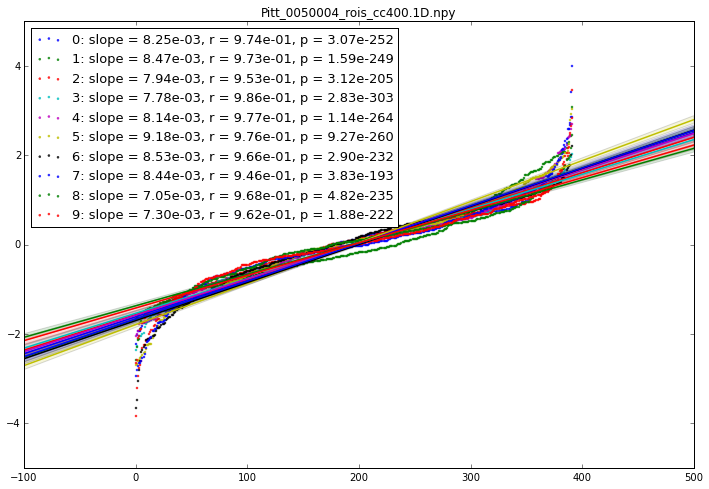

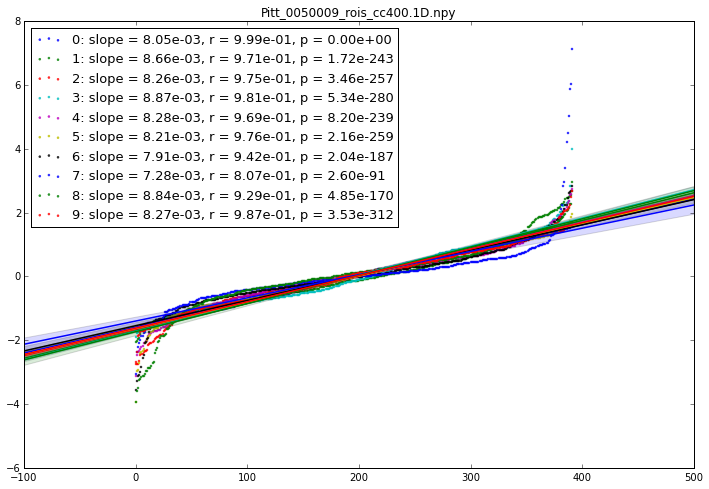

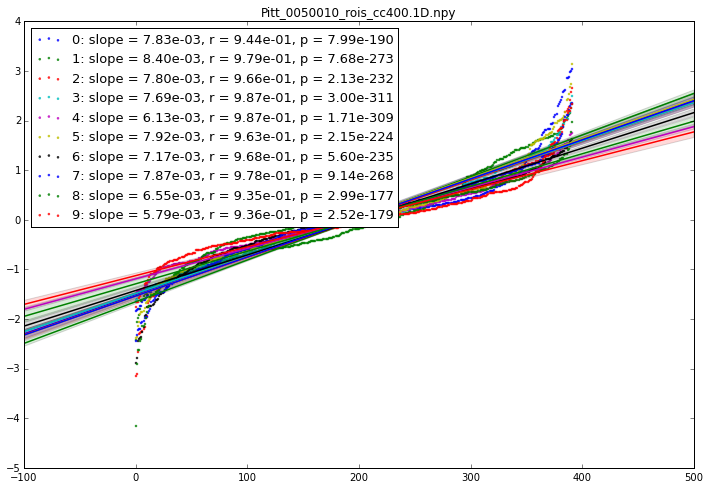

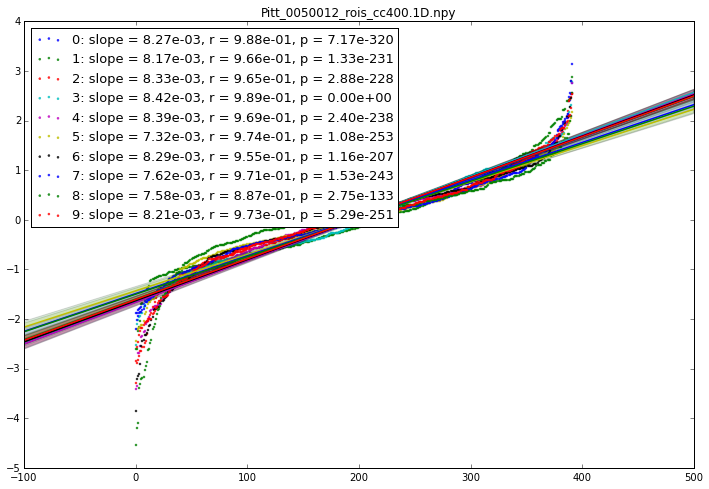

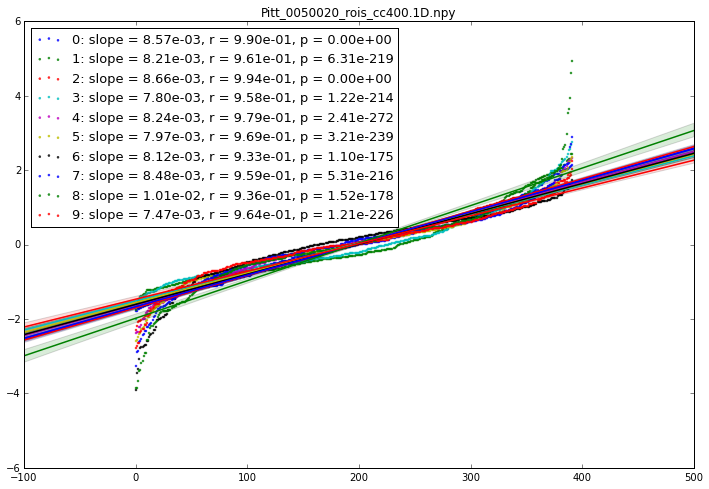

(5, 10)

In [6]:
path = './data/Outputs/Regs/'
grdnt_slope = []
#only run for first few for testing
testnum=5
for filename in selected[:testnum]:
    temp = []
    # do we need a specific ordering of the nodes??
    grdnt = np.load(os.path.join(path,filename))
    x = np.arange(grdnt.shape[0])
    fig,ax = plt.subplots(figsize=(12,8))
    for ii in range(10):
        y = np.sort(grdnt[:,ii])# just sort in ascending order?
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        #visualize
        label = '{}: slope = {:.2e}, r = {:.2e}, p = {:.2e}'.format(ii,slope,r_value,p_value)
        sn.regplot(x,y,scatter_kws={'s': 4,'marker':'o'},ax=ax,label=label)
        temp.append(slope)
        
    ax.legend(loc='upper left',fontsize=13)
    ax.set_title(filename)
    plt.show()
    grdnt_slope.append(temp)
    
grdnt_slope = np.array(grdnt_slope)
grdnt_slope.shape